In [1]:
# import libraries

import pandas as pd
import numpy as np

import missingno as msno

# Pandas warning messages (optional)
pd.options.mode.chained_assignment = None  #default='warn'

# Plot options
import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette('deep'))
sns.set_style("whitegrid")
%matplotlib inline

#### The dataset was downloaded from [insideairbnb](http://insideairbnb.com/get-the-data.html) for the city of Austin, Date Compiled on March 17th, 2020. 
#### Let's import the dataset and take a look at the first few observations.

In [2]:
# import dataset
df = pd.read_csv('data/listings.csv', low_memory=False)
df.head()

id                        listing_url       scrape_id last_scraped  \
0  2265  https://www.airbnb.com/rooms/2265  20200317143754   2020-03-17   
1  5245  https://www.airbnb.com/rooms/5245  20200317143754   2020-03-17   
2  5456  https://www.airbnb.com/rooms/5456  20200317143754   2020-03-17   
3  5769  https://www.airbnb.com/rooms/5769  20200317143754   2020-03-17   
4  6413  https://www.airbnb.com/rooms/6413  20200317143754   2020-03-17   

                                                name  \
0   Zen-East in the Heart of Austin (monthly rental)   
1  Eco friendly, Colorful, Clean, Cozy monthly share   
2          Walk to 6th, Rainey St and Convention Ctr   
3                                     NW Austin Room   
4                      Gem of a Studio near Downtown   

                                             summary  \
0  Zen East is situated in a vibrant & diverse mu...   
1  Situated in a vibrant & diverse multicultural ...   
2  Great central  location for walking to Convent...   
3                                                NaN   
4  Great studio apartment, perfect for couples or...   

                                               space  \
0  This colorful and clean 1923 house was complet...   
1  This green, colorful, clean and cozy house was...   
2  Cute Private Studio apartment located in Willo...   
3  Looking for a comfortable inexpensive room to ...   
4  !!!!! SXSW info !!!!! Presently open (again!) ...   

                                         description experiences_offered  \
0  Zen East is situated in a vibrant & diverse mu...                none   
1  Situated in a vibrant & diverse multicultural ...                none   
2  Great central  location for walking to Convent...                none   
3  Looking for a comfortable inexpensive room to ...                none   
4  Great studio apartment, perfect for couples or...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                f   
1                                                NaN  ...                f   
2  My neighborhood is ideally located if you want...  ...                f   
3  Quiet neighborhood with lots of trees and good...  ...                f   
4  Travis Heights is one of the oldest neighborho...  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f                     moderate   
4                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                t   
3                             t                                t   
4                             f                                f   

   calculated_host_listings_count  \
0                               3   
1                               3   
2                               1   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            2   
1                                            2   
2                                            1   
3                                            0   
4                                            1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            0   
3                                            1   
4                                            0   

   calculated_host_listings_

In [3]:
# shape
df.shape

(11668, 106)

The Airbnb dataset for Austin, TX consists of 106 features and 11668 observations. We need to look at these features closely and drop the ones that do not help our model to predict the rental prices. 

In [4]:
# specifying max_cols=df.shape[1] so we can look at the columns in df.info()
df.info(max_cols=df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11668 entries, 0 to 11667
Data columns (total 106 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11668 non-null  int64  
 1   listing_url                                   11668 non-null  object 
 2   scrape_id                                     11668 non-null  int64  
 3   last_scraped                                  11668 non-null  object 
 4   name                                          11668 non-null  object 
 5   summary                                       11244 non-null  object 
 6   space                                         9083 non-null   object 
 7   description                                   11461 non-null  object 
 8   experiences_offered                           11668 non-null  object 
 9   neighborhood_overview                         7937 non-null 

In [5]:
# ordering null columns based on the number of null values in each column
print('Columns with Null values by their count:')
df.isnull().sum().sort_values(ascending=False)[:25]

Columns with Null values by their count:


neighbourhood_group_cleansed    11668
thumbnail_url                   11668
medium_url                      11668
xl_picture_url                  11668
license                         11621
square_feet                     11476
monthly_price                   10931
weekly_price                    10793
notes                            6115
access                           4917
transit                          4370
host_about                       4099
interaction                      3862
house_rules                      3759
neighborhood_overview            3731
host_response_rate               3462
host_response_time               3462
security_deposit                 3100
host_acceptance_rate             2765
review_scores_location           2675
review_scores_value              2674
review_scores_communication      2670
review_scores_checkin            2670
review_scores_cleanliness        2669
review_scores_accuracy           2669
dtype: int64

Using MSNO to look at Misisng Values in 25 columns visually.

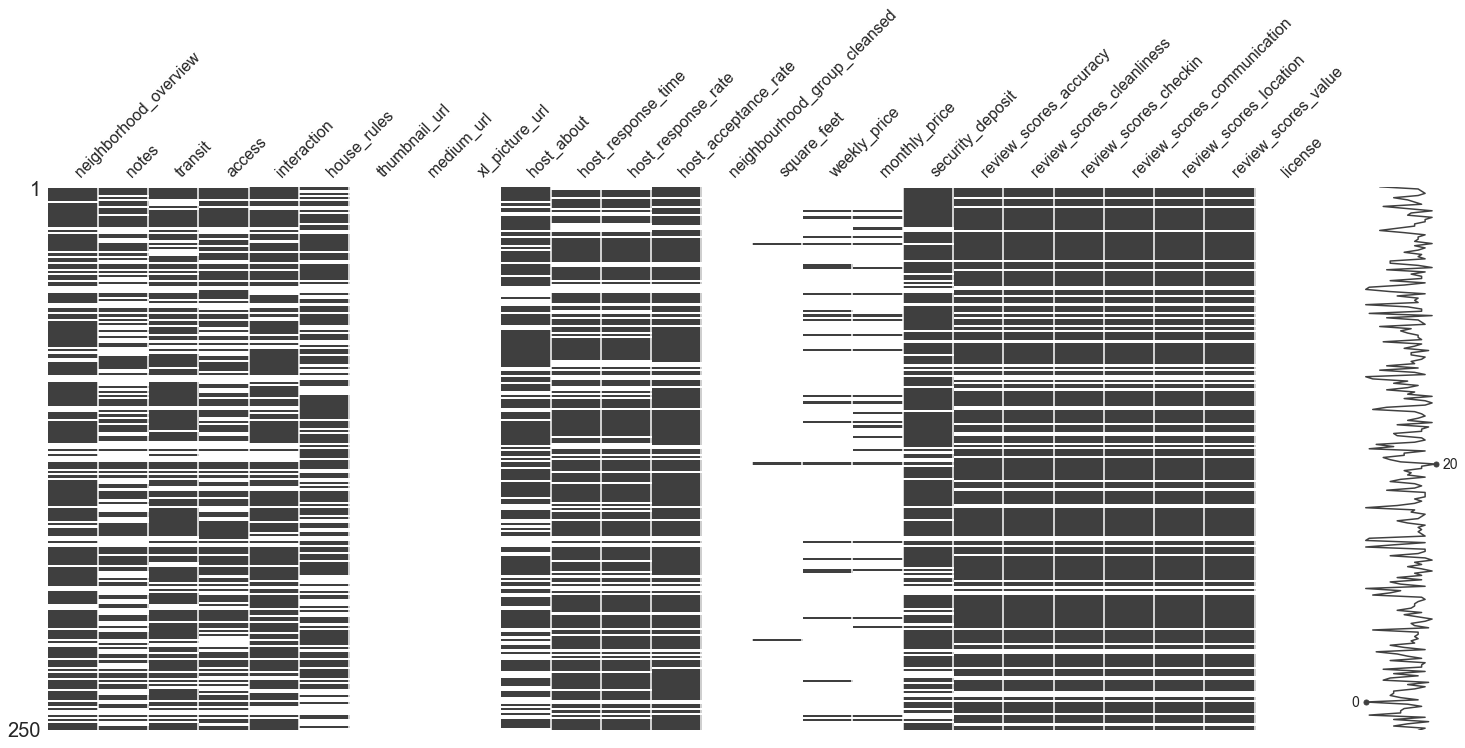

In [6]:
filtered_data = msno.nullity_filter(df, filter='bottom', n=25, p=0.999) # or filter='top'
msno.matrix(filtered_data.sample(250))

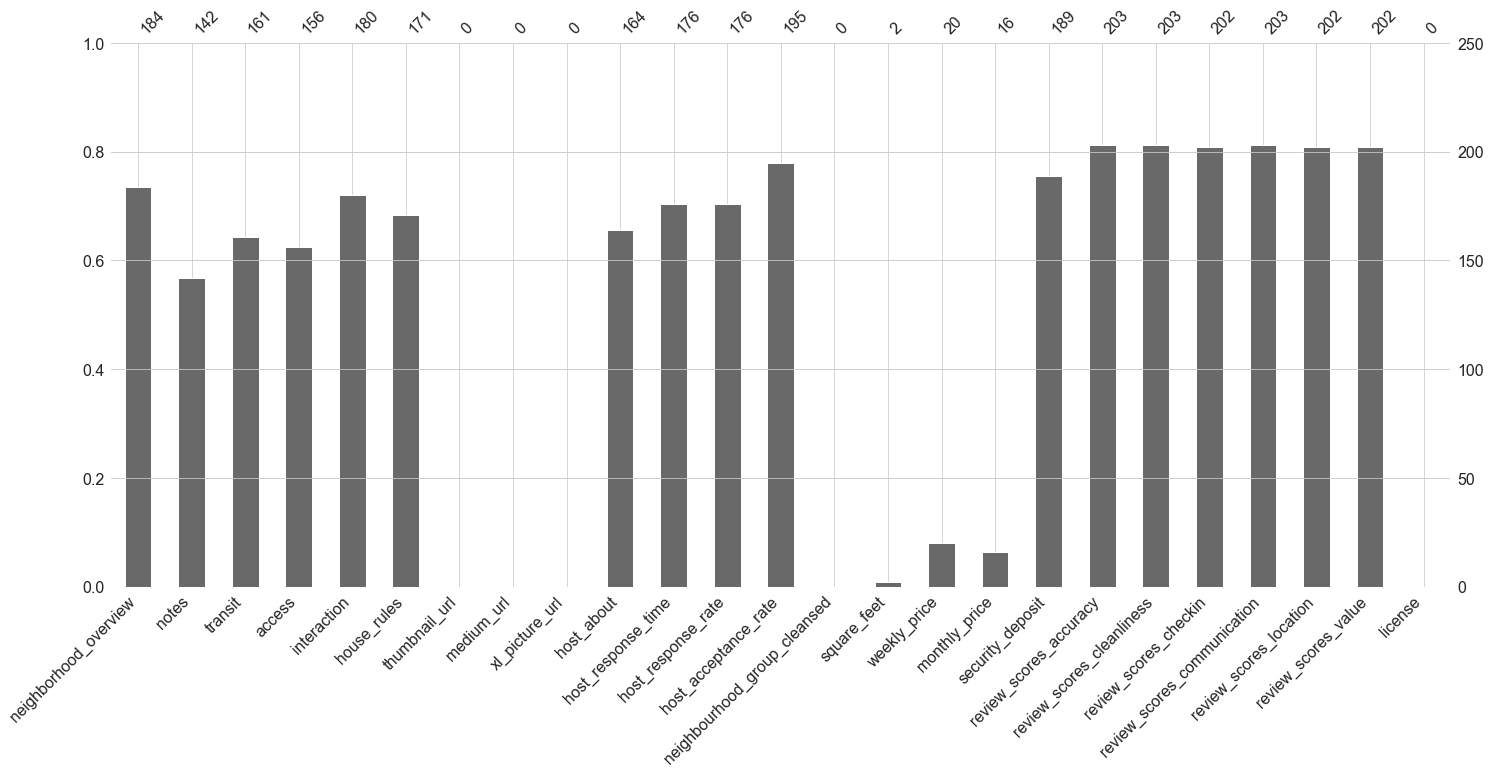

In [7]:
msno.bar(filtered_data.sample(250))

Features like 'square_feet', 'monthly_price' or 'weekly_price' have a lot of NULL values but we can use bedroom, bathroom, and accommodates data as a replacement for space size and also use 'price' for our prediction instead of 'monthly_price' or 'weekly_price'. 

In [8]:
df[['price','monthly_price', 'weekly_price']]

price monthly_price weekly_price
0      $225.00           NaN          NaN
1      $100.00           NaN          NaN
2       $95.00           NaN          NaN
3       $40.00           NaN      $160.00
4       $99.00     $1,900.00      $700.00
...        ...           ...          ...
11663   $60.00           NaN          NaN
11664   $40.00           NaN          NaN
11665   $40.00           NaN          NaN
11666   $45.00           NaN          NaN
11667   $35.00           NaN          NaN

[11668 rows x 3 columns]

In [9]:
# Looking at describe() to get some insights on price and other numerical values
df.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  1.166800e+04  1.166800e+04            0.0         0.0             0.0   
mean   2.372608e+07  2.020032e+13            NaN         NaN             NaN   
std    1.314942e+07  2.511826e+00            NaN         NaN             NaN   
min    2.265000e+03  2.020032e+13            NaN         NaN             NaN   
25%    1.275706e+07  2.020032e+13            NaN         NaN             NaN   
50%    2.361444e+07  2.020032e+13            NaN         NaN             NaN   
75%    3.599878e+07  2.020032e+13            NaN         NaN             NaN   
max    4.293155e+07  2.020032e+13            NaN         NaN             NaN   

            host_id  host_listings_count  host_total_listings_count  \
count  1.166800e+04         11666.000000               11666.000000   
mean   7.673078e+07            66.963398                  66.963398   
std    8.628560e+07           281.215856                 281.215856   
min    2.300000e+01             0.000000                   0.000000   
25%    8.761906e+06             1.000000                   1.000000   
50%    3.939813e+07             1.000000                   1.000000   
75%    1.185659e+08             4.000000                   4.000000   
max    3.416244e+08          2016.000000                2016.000000   

       neighbourhood_cleansed  neighbourhood_group_cleansed  ...  \
count            11668.000000                           0.0  ...   
mean             78722.143469                           NaN  ...   
std                 20.689544                           NaN  ...   
min              78701.000000                           NaN  ...   
25%              78704.000000                           NaN  ...   
50%              78717.000000                           NaN  ...   
75%              78744.000000                           NaN  ...   
max              78759.000000                           NaN  ...   

       review_scores_cleanliness  review_scores_checkin  \
count                8999.000000            8998.000000   
mean                    9.607512               9.838964   
std                     0.838195               0.611808   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  8998.000000             8993.000000   
mean                      9.848188                9.779162   
std                       0.600158                0.615760   
min                       2.000000                2.000000   
25%                      10.000000               10.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  calculated_host_listings_count  \
count          8994.000000                    11668.000000   
mean              9.587725                       13.572506   
std               0.794404                       41.256138   
min               2.000000                        1.000000   
25%               9.000000                        1.000000   
50%              10.000000                        1.000000   
75%              10.000000                        4.000000   
max              10.000000                      248.000000   

       calculated_host_listings_count_entire_homes  \
count                                 11668.000000   
mean                                     12.477288   
std                                      41.041238   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%            

Notice that 'price' is not included on the describe() above! Let's investigate why 'price' did not show up!

In [10]:
# describe for price
df['price'].head()

0    $225.00
1    $100.00
2     $95.00
3     $40.00
4     $99.00
Name: price, dtype: object

'price' is type object and needs to be transformed to the correct data type.

In [11]:
# Convert price to from currency to float
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float, 2)

In [12]:
# Verify price type is float
df['price'].head()

0    225.0
1    100.0
2     95.0
3     40.0
4     99.0
Name: price, dtype: float64

In [13]:
df.price.describe()

count    11668.000000
mean       484.237830
std       1480.352627
min          0.000000
25%         80.000000
50%        149.000000
75%        300.000000
max      14298.000000
Name: price, dtype: float64

Defined a mask for price based on below 25% quartile as 'low', below 50% as 'med' and the rest was set as 'high'

In [14]:
price_bins=[]
for price in df.price:
    if price < 81:
        price_bins.append('low')
    if price < 150:
        price_bins.append('med')
    else:
        price_bins.append('high')

In [15]:
[[x,price_bins.count(x)] for x in set(price_bins)]

[['high', 5770], ['low', 2944], ['med', 5898]]

In [16]:
df['price_bins'] = pd.Series(price_bins)

In [17]:
df[['price', 'price_bins']]

price price_bins
0      225.0       high
1      100.0        med
2       95.0        med
3       40.0        low
4       99.0        med
...      ...        ...
11663   60.0        med
11664   40.0       high
11665   40.0       high
11666   45.0        med
11667   35.0        med

[11668 rows x 2 columns]

med     4750
high    4598
low     2320
Name: price_bins, dtype: int64


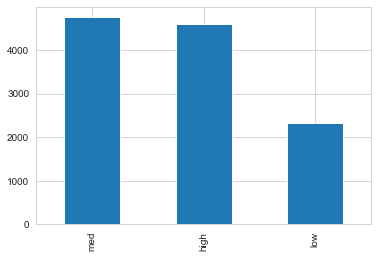

In [18]:
print(df['price_bins'].value_counts())
df['price_bins'].value_counts().plot(kind='bar');

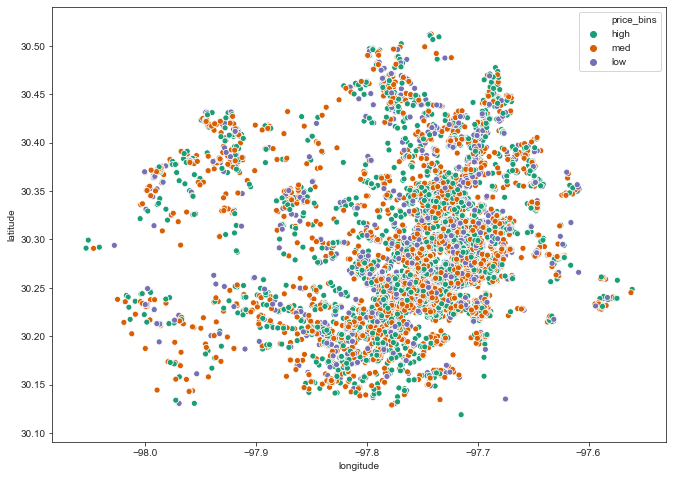

In [19]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price_bins', palette='Dark2', ax=ax);

Entire home/apt    8848
Private room       2610
Shared room         159
Hotel room           51
Name: room_type, dtype: int64


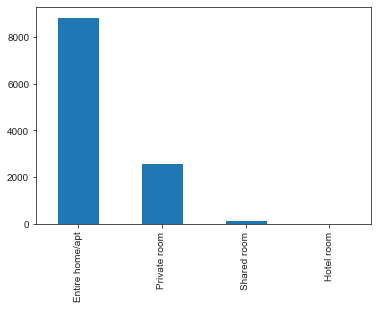

In [20]:
# Let's look at the room_type distribution
print(df['room_type'].value_counts())
df['room_type'].value_counts().plot(kind='bar');

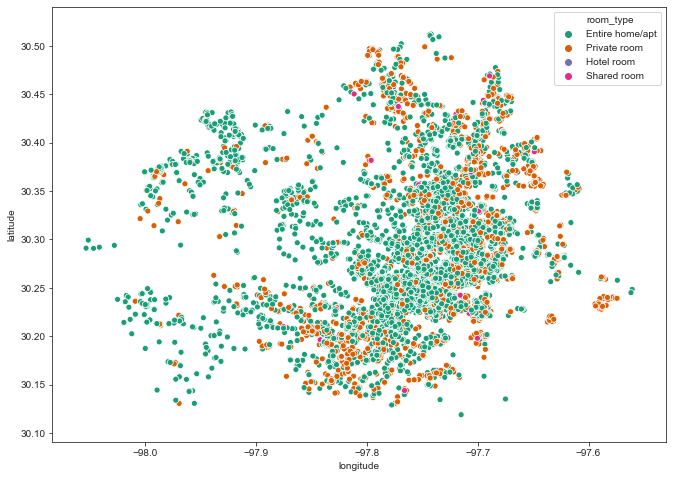

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type', palette='Dark2', ax=ax);

In [22]:
#df['lat_long']= list(zip(df['latitude'], df['longitude']))

In [23]:
#df[['lat_long', 'latitude', 'longitude']]

East Downtown          1087
Downtown                742
Travis Heights          462
University of Texas     434
East Riverside          374
                       ... 
Gateway                  22
Mesa Park                12
Cat Mountian             11
Walnut Creek              7
Canyon Mesa               6
Name: neighbourhood, Length: 78, dtype: int64


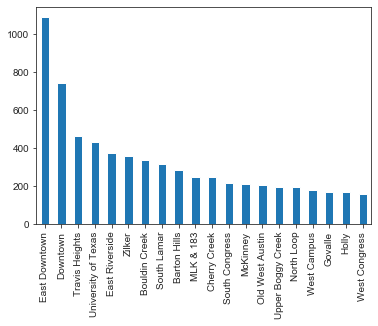

In [24]:
# Let's look at the neighbourhood distribution 
print(df['neighbourhood'].value_counts())
df['neighbourhood'].value_counts()[:20].plot(kind='bar');

In [25]:
df[['neighbourhood_cleansed', 'neighbourhood', 'neighbourhood_group_cleansed']]

neighbourhood_cleansed      neighbourhood  neighbourhood_group_cleansed
0                       78702      East Downtown                           NaN
1                       78702      East Downtown                           NaN
2                       78702      East Downtown                           NaN
3                       78729  SW Williamson Co.                           NaN
4                       78704     Travis Heights                           NaN
...                       ...                ...                           ...
11663                   78704     South Congress                           NaN
11664                   78741        Parker Lane                           NaN
11665                   78741     East Riverside                           NaN
11666                   78704     Travis Heights                           NaN
11667                   78721           Downtown                           NaN

[11668 rows x 3 columns]

In [26]:
columns_list = ['room_type', 'price', 'accommodates', 'bathrooms', 'bedrooms',  
                'host_is_superhost', 'neighbourhood_cleansed', 'longitude', 'latitude', 
                'number_of_reviews', 'availability_365', 'review_scores_rating', 
                'minimum_nights', 'listing_url']

df = df[columns_list]

In [27]:
df.head()

room_type  price  accommodates  bathrooms  bedrooms  \
0  Entire home/apt  225.0             4        2.0       2.0   
1     Private room  100.0             2        1.0       1.0   
2  Entire home/apt   95.0             3        1.0       1.0   
3     Private room   40.0             2        1.0       1.0   
4  Entire home/apt   99.0             2        1.0       0.0   

  host_is_superhost  neighbourhood_cleansed  longitude  latitude  \
0                 t                   78702  -97.71398  30.27750   
1                 t                   78702  -97.71379  30.27577   
2                 t                   78702  -97.73448  30.26112   
3                 t                   78729  -97.78422  30.45697   
4                 t                   78704  -97.73726  30.24829   

   number_of_reviews  availability_365  review_scores_rating  minimum_nights  \
0                 24                 0                  93.0              30   
1                  9                 0                  91.0              30   
2                529               334                  97.0               2   
3                257                14                  98.0               1   
4                112                 0                  99.0               3   

                         listing_url  
0  https://www.airbnb.com/rooms/2265  
1  https://www.airbnb.com/rooms/5245  
2  https://www.airbnb.com/rooms/5456  
3  https://www.airbnb.com/rooms/5769  
4  https://www.airbnb.com/rooms/6413

C:\Users\rtalebiz\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


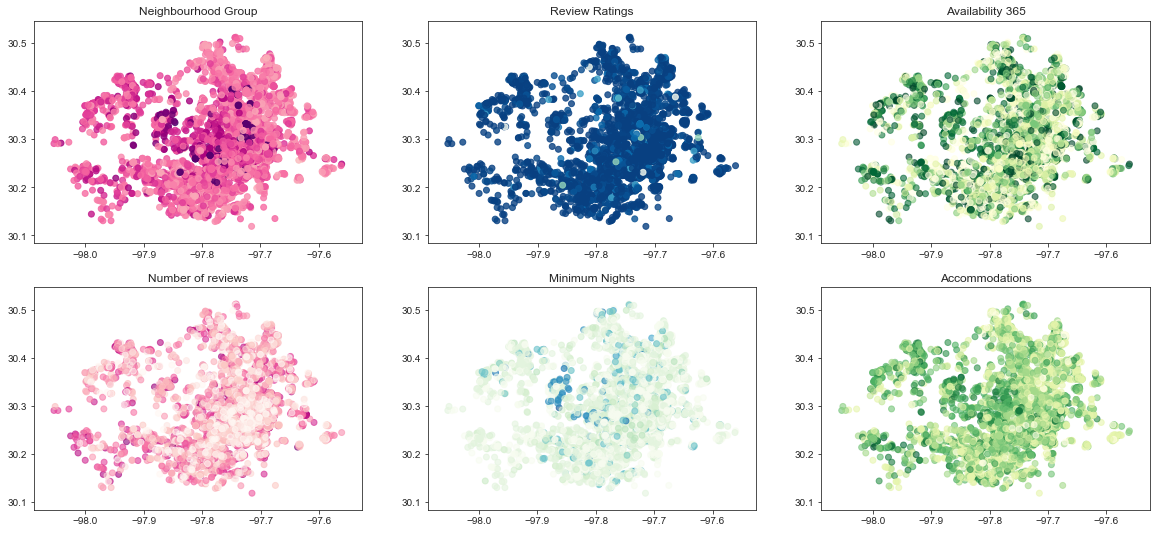

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9))

axes[0,0].scatter(x=df['longitude'], y=df['latitude'], c=np.log(df['price']), cmap='RdPu', alpha=0.8)
axes[0,0].set_title('Neighbourhood Group')

axes[0,1].scatter(x=df['longitude'], y=df['latitude'], c=np.log(df['review_scores_rating']), cmap='GnBu', alpha=0.8)
axes[0,1].set_title('Review Ratings')

axes[0,2].scatter(x=df['longitude'], y=df['latitude'], c=df['availability_365'], cmap='YlGn', alpha=0.6)
axes[0,2].set_title('Availability 365')

axes[1,0].scatter(x=df['longitude'], y=df['latitude'], c=np.log(df['number_of_reviews']), cmap='RdPu', alpha=0.6)
axes[1,0].set_title('Number of reviews')

axes[1,1].scatter(x=df['longitude'], y=df['latitude'], c=np.log(df['minimum_nights']), cmap='GnBu', alpha=0.6)
axes[1,1].set_title('Minimum Nights')

axes[1,2].scatter(x=df['longitude'], y=df['latitude'], c=np.log(df['accommodates']), cmap='YlGn', alpha=0.6)
axes[1,2].set_title('Accommodations')

plt.show()

Noting for cleanup:

* Price needs to be converted to float (This has been done already)
* Missing NaN values need data imputed or rows removed
* Categorical columns need to be converted to dummy variables (get_dummies)
* To continue the data exploration, I need to perform some cleanup procedures. I'll create a cleanup function to put these cleaning steps together.

In [29]:
print("Dataset has {} row entries.".format(df.shape[0]))

Dataset has 11668 row entries.


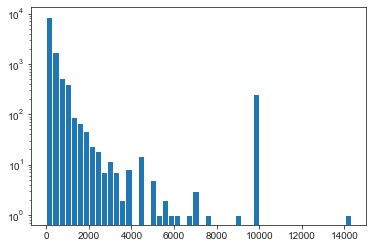

In [30]:
# Let's look at the rental price distribution
fig, ax = plt.subplots()
ax.hist(df['price'], bins=50)
ax.set_yscale("log", nonposy='clip')
plt.show();

There are some oddly high prices (> $2000) that we need to examine to find out if the rental is a large proporty. We'll look at price per person (price / accommodates) to check for outliers.

In [31]:
# Create 'price_per_person' feature
df['price_per_person'] = df['price']/df['accommodates']

df['price_per_person'].value_counts().sort_index(ascending=False).head(10)

5000.000000     13
3500.000000      1
3333.333333      3
2500.000000    161
2000.000000      4
1750.000000      1
1666.666667     65
1500.000000      1
1200.000000      1
1191.500000      1
Name: price_per_person, dtype: int64

In [32]:
df.loc[df['price_per_person'] > 1000.00]

room_type    price  accommodates  bathrooms  bedrooms  \
404       Private room   7000.0             4        1.0       1.0   
1179      Private room   1200.0             1        1.0       1.0   
3506   Entire home/apt  10000.0             4        1.0       2.0   
3950      Private room  10000.0             2        1.0       1.0   
5461   Entire home/apt  10000.0             5        1.0       1.0   
...                ...      ...           ...        ...       ...   
11613  Entire home/apt  10000.0             6        2.0       2.0   
11616  Entire home/apt  10000.0             4        1.0       1.0   
11617  Entire home/apt  10000.0             4        1.0       1.0   
11629  Entire home/apt   3000.0             2        1.0       1.0   
11632  Entire home/apt  10000.0             6        2.0       2.0   

      host_is_superhost  neighbourhood_cleansed  longitude  latitude  \
404                   f                   78749  -97.86655  30.22530   
1179                  f                   78741  -97.70267  30.23572   
3506                  f                   78703  -97.77171  30.30439   
3950                  f                   78723  -97.69715  30.29481   
5461                  f                   78701  -97.75059  30.26969   
...                 ...                     ...        ...       ...   
11613                 f                   78746  -97.78618  30.26654   
11616                 f                   78752  -97.72279  30.33052   
11617                 f                   78752  -97.72102  30.33087   
11629                 f                   78704  -97.76023  30.24547   
11632                 f                   78745  -97.77461  30.21000   

       number_of_reviews  availability_365  review_scores_rating  \
404                    2                 0                  80.0   
1179                   1                 0                 100.0   
3506                   0               365                   NaN   
3950                   0               364                   NaN   
5461                   1               180                 100.0   
...                  ...               ...                   ...   
11613                  0               180                   NaN   
11616                  0               177                   NaN   
11617                  0               180                   NaN   
11629                  0               103                   NaN   
11632                  0               180                   NaN   

       minimum_nights                            listing_url  price_per_person  
404                 3    https://www.airbnb.com/rooms/925980       1750.000000  
1179               30   https://www.airbnb.com/rooms/4258156       1200.000000  
3506               30  https://www.airbnb.com/rooms/16268096       2500.000000  
3950                1  https://www.airbnb.com/rooms/17607193       5000.000000  
5461              500  https://www.airbnb.com/rooms/23003072       2000.000000  
...               ...                                    ...               ...  
11613               1  https://www.airbnb.com/rooms/42860293       1666.666667  
11616               1  https://www.airbnb.com/rooms/42861546       2500.000000  
11617               1  https://www.airbnb.com/rooms/42862664       2500.000000  
11629               3  https://www.airbnb.com/rooms/42883227       1500.000000  
11632               1  https://www.airbnb.com/rooms/42891502       1666.666667  

[252 rows x 15 columns]

Upon reviewing the url listings, the houses listed as with extreme prices looked like automated (or unmaintained) listings with little to no reviews with some being incorrectly priced at the time of the source data scrape. I'm opting to remove them from this analysis since they don't pass my common sense as a consumer. However, it would be intersting to examine other popular cities to see if they had similar outliers.

In [33]:
# remove rows with > $1000 per person
df = df.loc[df['price_per_person'] <= 1000.00]

# verify removal
df['price_per_person'].value_counts().sort_index(ascending=False).head()

1000.000000    4
980.000000     1
937.500000     1
875.000000     1
833.333333     1
Name: price_per_person, dtype: int64

In [34]:
df.describe()

price  accommodates     bathrooms      bedrooms  \
count  11416.000000  11416.000000  11403.000000  11401.000000   
mean     276.498598      4.714961      1.552311      1.798351   
std      469.550298      3.282795      0.878670      1.280468   
min        0.000000      1.000000      0.000000      0.000000   
25%       80.000000      2.000000      1.000000      1.000000   
50%      142.000000      4.000000      1.000000      1.000000   
75%      299.000000      6.000000      2.000000      2.000000   
max    10000.000000     33.000000     17.000000     23.000000   

       neighbourhood_cleansed     longitude      latitude  number_of_reviews  \
count            11416.000000  11416.000000  11416.000000       11416.000000   
mean             78721.966538    -97.751277     30.277975          32.007533   
std                 20.598962      0.056845      0.057474          64.179349   
min              78701.000000    -98.053550     30.118850           0.000000   
25%              78703.000000    -97.767572     30.244400           1.000000   
50%              78717.000000    -97.744905     30.266690           7.000000   
75%              78744.000000    -97.721127     30.298212          32.000000   
max              78759.000000    -97.560620     30.512280         947.000000   

       availability_365  review_scores_rating  minimum_nights  \
count      11416.000000           8795.000000    11416.000000   
mean         134.223196             96.095168        5.317186   
std          135.769308              7.072462       16.113789   
min            0.000000             20.000000        1.000000   
25%            0.000000             95.000000        1.000000   
50%           86.000000             98.000000        2.000000   
75%          274.000000            100.000000        3.000000   
max          365.000000            100.000000      365.000000   

       price_per_person  
count      11416.000000  
mean          57.816575  
std           68.269731  
min            0.000000  
25%           25.000000  
50%           37.500000  
75%           62.500000  
max         1000.000000

The review ratings (review_scores_rating) are missing a lot of data. However, due to the small size of the data set, I'll opt to fill the missing values of the ratings scores at the cost of diluting the ratings feature importance. Before I do this, I'll save a copy of the DataFrame in it's current state since I want to look at a plot of price vs. rating later.

In [35]:
# Imputed mean value of review scores to missing data in review_scores_rating feature
print("Filling NaN 'review_scores_rating' with {:.3f}.".format(df['review_scores_rating'].mean()))
df['review_scores_rating'].fillna((df['review_scores_rating'].mean()), inplace=True)

Filling NaN 'review_scores_rating' with 96.095.


The bathrooms feature is missing some data. I'll update the NaNs based on the standard ratio of the number of bathrooms needed in a home which is two for every three rooms. I'll assign a bathroom for every 2 people.

In [36]:
df[df['bathrooms'].isnull()].head()

room_type  price  accommodates  bathrooms  bedrooms  \
106  Entire home/apt  175.0             5        NaN       3.0   
120  Entire home/apt  350.0             4        NaN       2.0   
145     Private room   80.0             2        NaN       1.0   
156  Entire home/apt  400.0             3        NaN       2.0   
173  Entire home/apt  225.0             2        NaN       2.0   

    host_is_superhost  neighbourhood_cleansed  longitude  latitude  \
106                 f                   78723  -97.68496  30.30340   
120                 f                   78730  -97.79621  30.35672   
145                 f                   78759  -97.76717  30.42198   
156                 f                   78702  -97.72019  30.25820   
173                 f                   78746  -97.80005  30.34442   

     number_of_reviews  availability_365  review_scores_rating  \
106                  1                 0             80.000000   
120                  0                 0             96.095168   
145                 33                83             96.000000   
156                  0                 0             96.095168   
173                  1                 0             80.000000   

     minimum_nights                          listing_url  price_per_person  
106               2  https://www.airbnb.com/rooms/247770         35.000000  
120               4  https://www.airbnb.com/rooms/314152         87.500000  
145              32  https://www.airbnb.com/rooms/337125         40.000000  
156               3  https://www.airbnb.com/rooms/342919        133.333333  
173               3  https://www.airbnb.com/rooms/353955        112.500000

In [37]:
# Replacing all 0 values in bathrooms with 'NaN'
df['bathrooms'].replace(0, np.nan, inplace=True)

In [38]:
# Bathrooms is getting scaled later, so I do not care about making it a discrete value
# Also 0.5 is commonly known as a 'half-bath'
df['bathrooms'].fillna((df['accommodates']//2), inplace=True)

In [39]:
df.loc[[120]]

room_type  price  accommodates  bathrooms  bedrooms  \
120  Entire home/apt  350.0             4        2.0       2.0   

    host_is_superhost  neighbourhood_cleansed  longitude  latitude  \
120                 f                   78730  -97.79621  30.35672   

     number_of_reviews  availability_365  review_scores_rating  \
120                  0                 0             96.095168   

     minimum_nights                          listing_url  price_per_person  
120               4  https://www.airbnb.com/rooms/314152              87.5

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11416 entries, 0 to 11667
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   room_type               11416 non-null  object 
 1   price                   11416 non-null  float64
 2   accommodates            11416 non-null  int64  
 3   bathrooms               11416 non-null  float64
 4   bedrooms                11401 non-null  float64
 5   host_is_superhost       11414 non-null  object 
 6   neighbourhood_cleansed  11416 non-null  int64  
 7   longitude               11416 non-null  float64
 8   latitude                11416 non-null  float64
 9   number_of_reviews       11416 non-null  int64  
 10  availability_365        11416 non-null  int64  
 11  review_scores_rating    11416 non-null  float64
 12  minimum_nights          11416 non-null  int64  
 13  listing_url             11416 non-null  object 
 14  price_per_person        11416 non-null

In [41]:
df.isnull().sum()

room_type                  0
price                      0
accommodates               0
bathrooms                  0
bedrooms                  15
host_is_superhost          2
neighbourhood_cleansed     0
longitude                  0
latitude                   0
number_of_reviews          0
availability_365           0
review_scores_rating       0
minimum_nights             0
listing_url                0
price_per_person           0
dtype: int64

In [42]:
df[df['bedrooms'].isnull()].head()

room_type  price  accommodates  bathrooms  bedrooms  \
9659   Entire home/apt  100.0             2        1.0       NaN   
9741   Entire home/apt  100.0             2        1.0       NaN   
10286  Entire home/apt   80.0             4        1.0       NaN   
11096  Entire home/apt   80.0             2        1.0       NaN   
11357  Entire home/apt   85.0             2        1.0       NaN   

      host_is_superhost  neighbourhood_cleansed  longitude  latitude  \
9659                  f                   78701  -97.73815  30.27715   
9741                  t                   78704  -97.76369  30.25503   
10286                 f                   78722  -97.70992  30.28476   
11096                 t                   78758  -97.72143  30.39580   
11357                 f                   78723  -97.67123  30.31082   

       number_of_reviews  availability_365  review_scores_rating  \
9659                   0               177             96.095168   
9741                  28                31             99.000000   
10286                  4                88            100.000000   
11096                  5               344            100.000000   
11357                  0               259             96.095168   

       minimum_nights                            listing_url  price_per_person  
9659                5  https://www.airbnb.com/rooms/38819415              50.0  
9741                2  https://www.airbnb.com/rooms/38955548              50.0  
10286               1  https://www.airbnb.com/rooms/40171545              20.0  
11096               1  https://www.airbnb.com/rooms/42145069              40.0  
11357               1  https://www.airbnb.com/rooms/42485149              42.5

In [43]:
(df['bathrooms'] == 0).sum()

6

In [44]:
df[df['bedrooms'] == 0].room_type.value_counts()

Entire home/apt    650
Private room        42
Name: room_type, dtype: int64

In [45]:
df[df['bedrooms'] == 0].accommodates.value_counts()

2     364
4     157
3     124
1      14
5      12
6       8
16      4
8       3
11      2
10      2
12      1
7       1
Name: accommodates, dtype: int64

In [46]:
# Replacing all 0 values in bathrooms with 'NaN'
df['bedrooms'].replace(0, np.nan, inplace=True)

In [47]:
df['bedrooms'].fillna((df['accommodates']//2), inplace=True)

In [48]:
df.loc[4]

room_type                                   Entire home/apt
price                                                    99
accommodates                                              2
bathrooms                                                 1
bedrooms                                                  1
host_is_superhost                                         t
neighbourhood_cleansed                                78704
longitude                                          -97.7373
latitude                                            30.2483
number_of_reviews                                       112
availability_365                                          0
review_scores_rating                                     99
minimum_nights                                            3
listing_url               https://www.airbnb.com/rooms/6413
price_per_person                                       49.5
Name: 4, dtype: object

In [49]:
# Drop the few remaining rows with missing values
df.dropna(inplace=True)

The data set severly lacks in samples for larger houses. I'm going to remove some of the extreme rows for these cases since I'm more interested in examining typically sized houses. Another study could be done for very large rental using data from all over the US.

In [50]:
df['bathrooms'].value_counts().sort_index(ascending=False)

17.0       1
11.0       1
9.0        1
8.0        5
7.5        2
7.0        5
6.5       12
6.0       21
5.5       22
5.0       50
4.5       79
4.0      142
3.5      186
3.0      420
2.5      772
2.0     2245
1.5      759
1.0     6671
0.5       14
0.0        6
Name: bathrooms, dtype: int64

In [51]:
df.groupby('bathrooms').price.median()

bathrooms
0.0       62.0
0.5       70.5
1.0      100.0
1.5      100.0
2.0      249.0
2.5      300.0
3.0      499.0
3.5      600.0
4.0      727.5
4.5      700.0
5.0     1000.0
5.5     1797.5
6.0     1300.0
6.5     2375.0
7.0     1250.0
7.5      920.0
8.0     1500.0
9.0     2100.0
11.0    2550.0
17.0    3875.0
Name: price, dtype: float64

In [52]:
df['accommodates'].value_counts().sort_index(ascending=False)

33       1
32       2
30       1
28       2
25       1
24       4
21       3
20       2
19       2
18       4
17       1
16     255
15      27
14      79
13      30
12     177
11      41
10     426
9      103
8      681
7      250
6     1609
5      633
4     2437
3      951
2     3236
1      456
Name: accommodates, dtype: int64

In [53]:
df.groupby('accommodates').price.mean()

accommodates
1       73.929825
2      114.914400
3      137.810726
4      240.475174
5      236.358610
6      323.032318
7      347.716000
8      529.753304
9      505.844660
10     781.300469
11     729.975610
12     710.768362
13     629.366667
14     918.518987
15     985.740741
16     827.290196
17    1170.000000
18    3776.750000
19    1740.000000
20    2387.500000
21    1722.000000
24    1404.250000
25     633.000000
28    1370.000000
30    2749.000000
32    1882.500000
33    1780.000000
Name: price, dtype: float64

In [54]:
# Remove extremely large rental listing due to low samples
df = df.loc[df['bathrooms'] <= 8]
df = df.loc[df['accommodates'] <= 16]

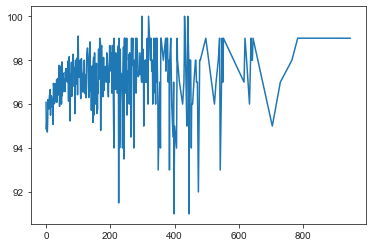

In [55]:
plt.plot(df.groupby('number_of_reviews').review_scores_rating.mean());

### Verify Data Quality
Need to verify that price is a float, review_scores_rating are not missing any values.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11388 entries, 0 to 11667
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   room_type               11388 non-null  object 
 1   price                   11388 non-null  float64
 2   accommodates            11388 non-null  int64  
 3   bathrooms               11388 non-null  float64
 4   bedrooms                11388 non-null  float64
 5   host_is_superhost       11388 non-null  object 
 6   neighbourhood_cleansed  11388 non-null  int64  
 7   longitude               11388 non-null  float64
 8   latitude                11388 non-null  float64
 9   number_of_reviews       11388 non-null  int64  
 10  availability_365        11388 non-null  int64  
 11  review_scores_rating    11388 non-null  float64
 12  minimum_nights          11388 non-null  int64  
 13  listing_url             11388 non-null  object 
 14  price_per_person        11388 non-null

### Data Preparation 
The data preparation process in the CRISP-DM cycle consists of:

* Select your data
* Clean your data
* Construct required data
* Integrate data (not required for this project)

#### Select your data
* This is the stage of the project where you decide on the data that you're going to use for analysis. [source](https://www.sv-europe.com/crisp-dm-methodology/). To answer the business questions posed at the beginning, I'm choosing to keep the following features:

* 'price' - target feature for the business questions
* 'room_type' - property type: house, private room, shared room
* 'accommodates' - property size metric
* 'bathrooms' - property size metric
* 'bedrooms' - property size metric
* 'host_is_superhost' - Airbnb host status
* 'neighbourhood_cleansed' - Location, ZIP code
* 'number_of_reviews' - Review metric
* 'review_scores_rating' - Review metric
* 'minimum_nights' - length of stay metric

#### Clean your data
This task involves raise the data quality to the level required by the analysis techniques that you've selected [source](https://www.sv-europe.com/crisp-dm-methodology/). I'm creating a 'cleaning' function so that I don't have to repeat the above steps everytime I load the notebook.

In [57]:
def clean_listings_data(csv, review_impute = True):
    '''
    Takes a listings.csv file (insideairbnb.com) for a particular
    city and outputs a cleaned the data frame 
    for the feature_list defined below. Note that the feature_list
    is hardcoded since the cleaning operations may not work for a
    different set of features. 
    
    Input:
    csv - insideairbnb.com listings.csv 
    review_impute - create additional DataFrames with no or '0' imputation 
                    for NaNs in the 'review_scores_rating' column
    
    Output:
    df - Cleaned DataFrame, used for prediction model
    df_no_impute - DataFrame with no imputed values on 'review_scores_rating'
    df_zeros_impute - DataFrame with integer '0' imputed values on 'review_scores_rating'
    '''
    
    # Import and load data
    df = pd.read_csv('data/listings.csv', low_memory=False)
    
    # Select features to keep in DataFrame
    feature_list = ['room_type', 'price', 'accommodates', 'bathrooms', 
                    'bedrooms', 'host_is_superhost', 'neighbourhood_cleansed', 
                    'number_of_reviews', 'review_scores_rating', 'minimum_nights']
    df = df[feature_list]
    
    # Convert price to from currency to float
    df['price'] = df['price'].str.replace('$', '')
    df['price'] = df['price'].str.replace(',', '')
    df['price'] = df['price'].astype(float)
    
    # Create feature for price per person
    df['price_per_person'] = df['price']/df['accommodates']
    
    # Remove rows with > $1000 per person
    df = df.loc[df['price_per_person'] <= 1000.00]
    
    # df for specific plots - need data before 'review_scores_rating' imputation
    df_no_impute = df[['review_scores_rating', 'price', 'price_per_person', 
                    'number_of_reviews', 'bathrooms', 'bedrooms', 'accommodates']].copy()
    df_zeros_impute = df_no_impute.copy()
    df_no_impute.dropna(inplace=True)
    df_zeros_impute['review_scores_rating'].fillna(0, inplace=True)
    df_zeros_impute.dropna(inplace=True)

    # Imputed mean value of review scores to missing data in review_scores_rating feature
    df['review_scores_rating'].fillna((df['review_scores_rating'].mean()), inplace=True)
    
    # Bathrooms is getting scaled later, so I do not care about making it a discrete value
    df['bathrooms'].fillna((df['accommodates']/4), inplace=True)
    
    # Drop the few remaining rows with missing values
    df.dropna(inplace=True)
    
    # Remove extremely large rental listing due to low samples
    df = df.loc[df['bathrooms'] <= 8]
    df = df.loc[df['accommodates'] <= 16]
    
    print('clean_listings_data: Cleaning Complete')
    
    if review_impute:
        return df, df_no_impute, df_zeros_impute
    else:
        return df

# Run cleanup function
df, df_no_impute, df_zeros_impute = clean_listings_data('data/listings.csv')

clean_listings_data: Cleaning Complete


### Construct required data
This task includes constructive data preparation operations such as the production of derived attributes or entire new records, or transformed values for existing attributes. source

Now that the DataFrame is cleaned, I want to sort all of the ZIP codes for Austin the into several regions to simplify the analysis. This could be easily updated for anyone who wants to redraw my subjective boundaries. Also, for a different city, the following would need to be redone with the appropriate ZIP codes.

Additionally, I need to create dummy variables and scale the features for the regression models.

In [58]:
# Compress zipcode into 5 regions for 1 hot encoding
zip_central = [78701, 78702, 78703, 78704, 78705, 78712, 78722]
zip_north = [78726, 78727, 78728, 78729, 78731, 78750, 78751,  
             78756, 78758, 78759, 78757]
zip_west = [78730, 78732, 78733, 78734, 78735, 78736, 78738, 78746]
zip_south = [78737, 78739, 78745, 78749, 78748, 78742]
zip_east = [78717, 78719, 78721, 78723, 78724, 78725, 78741, 
            78744, 78747, 78752, 78753, 78754]

map_dict = {}
str_dict = {0: 'Central', 1: 'North', 2: 'West', 3: 'South', 4: 'East'}
area_list = [zip_central, zip_north, zip_west, zip_south, zip_east]

# Create a dict for the pandas map function to convert zip into region
for i in range(len(area_list)):
    for zipcode in area_list[i]:
        map_dict[zipcode] = str_dict[i]   

# Replace 'neighbourhood_cleansed' with 'region' feature
df['region'] = df['neighbourhood_cleansed'].map(map_dict)
df.drop(['neighbourhood_cleansed'], axis=1, inplace=True)

In [59]:
df.head()

room_type  price  accommodates  bathrooms  bedrooms  \
0  Entire home/apt  225.0             4        2.0       2.0   
1     Private room  100.0             2        1.0       1.0   
2  Entire home/apt   95.0             3        1.0       1.0   
3     Private room   40.0             2        1.0       1.0   
4  Entire home/apt   99.0             2        1.0       0.0   

  host_is_superhost  number_of_reviews  review_scores_rating  minimum_nights  \
0                 t                 24                  93.0              30   
1                 t                  9                  91.0              30   
2                 t                529                  97.0               2   
3                 t                257                  98.0               1   
4                 t                112                  99.0               3   

   price_per_person   region  
0         56.250000  Central  
1         50.000000  Central  
2         31.666667  Central  
3         20.000000    North  
4         49.500000  Central

In [62]:
print (np.corrcoef(df['bedrooms'], df['accommodates']))

[[1.         0.80234208]
 [0.80234208 1.        ]]


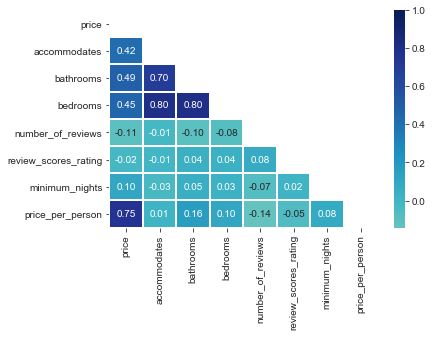

In [60]:
#Create the correlation matrix
corr= df.corr()[:10]
# Draw the heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


In [61]:
df.to_csv('data/listings_cleaned.csv')